In [91]:
# in this example, we will demonstrate how optimial transport may be combined with the Gerchberg-Saxton algorithm to solve the phase retrieval problem for a given target beam profile
# we will assume a synthetically generate input beam profile defined on a 2d Grid comensurate with the spatial resolution of the SLM
# This approximation will not be valid for real conditions, where the SLM itself distorts the beam profile in intensity and phase
using SLMTools

In [92]:
# define the SLM grid parameters. these are determined by the SLM itself
N_SLM_x = 1024 # number of rows in the SLM 
N_SLM_y = 1024 # number of columns in the SLM 
SLM_pixel_size = 17.0 # microns
L_SLM_pixels = (1:N_SLM_x,1:N_SLM_y) # the SLM grid, in pixels
L_SLM_microns = ((L_SLM_pixels[1] .- N_SLM_x/2).*SLM_pixel_size, (L_SLM_pixels[2] .- N_SLM_y/2).*SLM_pixel_size) # the SLM grid, in microns, centered at the origin

# define the target grid parameters, these are dtermined by the camera used to measure the beam profile at the target plane
# the camera is assumed to be placed at the focal plane of a lens
# for this demonstration, we can imagine a fictional camera with whatever parameters we like
N_target_x = 1024 # number of rows in the target grid
N_target_y = 1024 # number of columns in the target grid
# target_pixel_size = 17.0 # microns
# L_target_pixels = (1:N_target_x,1:N_target_y) # the target grid, in pixels
# L_target_microns = ((L_target_pixels[1] .- N_target_x / 2) .* target_pixel_size, (L_target_pixels[2] .- N_target_y / 2) .* target_pixel_size) # the target grid, in microns

1024

(-8687.0:17.0:8704.0, -8687.0:17.0:8704.0)
(-3129.4117647058824:6.112132352941177:3123.299632352941, -3129.4117647058824:6.112132352941177:3123.299632352941)


,

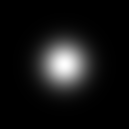
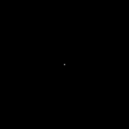

In [93]:
flambda = 1.064 * 1000 * 100
# let's now define the initial beam profile on the SLM. 
# In real conditions, this would be the beam profile determined by Phase Diversity methods, but for this example, we will assume a synthetically generated beam profile
sigma = 2*1000 # in microns
input_beam = lfGaussian(Intensity, (1024, 1024), sigma; L=L_SLM_microns, flambda=flambda) # the input beam profile, defined on the SLM grid. the second argument (sz) is unused since we supply the grid directly
L_target_microns = dualShiftLattice(input_beam.L, flambda)

# let's now define the target beam profile. this is always synthetically generated
# note that the target profile is dramatically smaller than the SLM grid and input beam
r_ring = 5.0 # microns
w_ring = 1.0 # microns
# target_beam = lfRing(Intensity, (N_target_x, N_target_y), r_ring, w_ring; L=L_target_microns, flambda=flambda) 
target_beam = lfGaussian(Intensity, (N_target_x, N_target_y), 20; L=L_target_microns, flambda=flambda)
# the target beam profile, defined on the target grid. the second argument (sz) is unused since we supply the grid directly
println(input_beam.L)
println(target_beam.L)
[look(input_beam), look(target_beam)]

(64, 64)(100, 100)


,

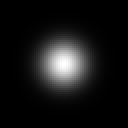
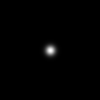

In [104]:
# now we have our input and desired output, and we have dualuated the target beam profile, we can now proceed to generating the phase mask
# our first step is to get the initial guess for the required phase profile on the SLM using Optimal Transport
# this part of the calulation doesn't actually depend on the duality of the two profiles, but the next step does
# however, the OT algorithm scales with the *total number of pixels* in the input and output profiles, so we must downsample
# the scaling is O(N^4)
ds = 16 # downsample factor
# OT_input_beam = coarsen(input_beam, ds) # downsample the input beam profile via averaging
OT_input_beam = downsample(input_beam, ds) # downsample the input beam profile via averaging
hw = 50 # half-width of the target beam profile, in pixels
hx = N_target_x÷2 # center of the target beam profile, in pixels
hy = N_target_y÷2 # center of the target beam profile, in pixels
OT_target_beam = target_beam[hx-hw+1:hx+hw, hy-hw+1:hy+hw] # extract the target beam profile from the center of the target grid
println(size(OT_input_beam), size(OT_target_beam))
[look(OT_input_beam), look(OT_target_beam)]

,

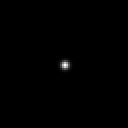
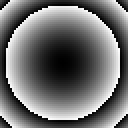

In [133]:
OT_guess = otPhase(OT_input_beam, OT_target_beam, 0.0013, maxiter = 1000)
OT_guess.data ./= (flambda/1)
out = sft(sqrt.(OT_input_beam.data) .* exp.(2pi * im * OT_guess.data)) .^ 2 |> nabs;
LFout = LatticeField{Intensity}(out, OT_input_beam.L);
[look(LFout),look(OT_guess)]

,

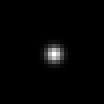
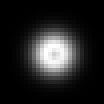

In [128]:
OT_guess_big = upsample(OT_guess, ds)
out_big = sft(sqrt.(input_beam.data) .* exp.(2pi * im * OT_guess_big.data)) .^ 2 |> nabs;
LFout_big = LatticeField{Intensity}(out_big, target_beam.L);
LFdev = LatticeField{Intensity}(abs.(out_big.-target_beam.data), target_beam.L);
[look(LFout_big[500:525,500:525]),look(LFdev[500:525,500:525])]

In [135]:
OT_guess = otPhase(OT_input_beam, OT_target_beam, 0.00123, maxiter=1000)
OT_guess.data ./= (flambda / 1)
out = sft(sqrt.(OT_input_beam.data) .* exp.(2pi * im * OT_guess.data)) .^ 2 |> nabs;
LFout = LatticeField{Intensity}(out, OT_input_beam.L);
[look(LFout), look(OT_guess)]

┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTransport C:\Users\micha\.julia\packages\OptimalTransport\ztQxB\src\entropic\sinkhorn_solve.jl:103


ErrorException: sinkhorn returned nan.  Try changing epsilon.